In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_excel('../data/raw/analise_dados_mod7_(1).xlsx')

In [3]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [4]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?
Empregado (CLT)                                                    2762
Empreendedor ou Empregado (CNPJ)                                    410
Desempregado, buscando recolocação                                  350
Estagiário                                                          188
Servidor Público                                                    156
Trabalho na área Acadêmica/Pesquisador                               86
Somente Estudante (graduação)                                        82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil      69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil        46
Somente Estudante (pós-graduação)                                    44
Freelancer                                                           39
Prefiro não informar                                                 24
Desempregado e não estou buscando recolocação                        15
Name: count, dtype: int64

In [5]:
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?']=='Empregado (CLT)']

In [8]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts(dropna=False)

QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?
Empregado (CLT)    2762
Name: count, dtype: int64

In [9]:
dados['COR/RACA/ETNIA'].value_counts()

COR/RACA/ETNIA
Branca                  1805
Parda                    661
Preta                    181
Amarela                   85
Prefiro não informar      16
Outra                     10
Indígena                   4
Name: count, dtype: int64

In [10]:
lista_retirar = ['Prefiro não informar', 'Outra', 'Indígena']

In [11]:
dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

In [12]:
dados['NAO BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0)

In [13]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?
de 1 a 2 anos                             743
de 3 a 4 anos                             584
de 4 a 6 anos                             416
Menos de 1 ano                            353
Mais de 10 anos                           277
de 7 a 10 anos                            232
Não tenho experiência na área de dados    127
Name: count, dtype: int64

In [14]:
dados['TEMPO EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [15]:
dados['TEMPO EXPERIENCIA'].value_counts()

TEMPO EXPERIENCIA
1     1096
3      584
4      416
10     277
7      232
Name: count, dtype: int64

In [16]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

NUMERO DE FUNCIONARIOS
Acima de 3.000      1313
de 101 a 500         503
de 1.001 a 3.000     368
de 501 a 1.000       248
de 51 a 100          146
de 11 a 50           112
de 6 a 10             24
de 1 a 5              18
Name: count, dtype: int64

In [17]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')

In [18]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

NUMERO DE FUNCIONARIOS
Acima de 3000     1313
de 101 a 500       503
de 1001 a 3000     368
de 501 a 1000      248
de 51 a 100        146
de 11 a 50         112
de 6 a 10           24
de 1 a 5            18
Name: count, dtype: int64

In [19]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [20]:
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

NUMERO DE FUNCIONARIOS
3000    1313
101      503
1001     368
501      248
51       146
11       112
6         24
1         18
Name: count, dtype: int64

In [21]:
dados['TEMPO EXPERIENCIA'].value_counts(dropna=False)

TEMPO EXPERIENCIA
1      1096
3       584
4       416
10      277
7       232
NaN     127
Name: count, dtype: int64

In [22]:
dados['TEMPO EXPERIENCIA'] = dados['TEMPO EXPERIENCIA'].fillna(0)

In [23]:
dados['TEMPO EXPERIENCIA'].value_counts()

TEMPO EXPERIENCIA
1     1096
3      584
4      416
10     277
7      232
0      127
Name: count, dtype: int64

In [24]:
dados['INSATISFACAO'] = 0

In [27]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts(dropna=False)

Qual o principal motivo da sua insatisfação com a empresa atual?
NaN                                                                                                                                                         2071
Gostaria de trabalhar em em outra área de atuação                                                                                                             69
Salário atual não corresponde ao mercado                                                                                                                      53
Falta de oportunidade de crescimento no emprego atual                                                                                                         46
Falta de maturidade analítica na empresa                                                                                                                      45
                                                                                                                                  

In [28]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 
'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

1       0
2       0
7       1
10      0
26      1
       ..
4227    0
4234    1
4238    0
4240    1
4270    1
Name: Qual o principal motivo da sua insatisfação com a empresa atual?, Length: 661, dtype: int64

In [29]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 
'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

In [30]:
dados['INSATISFACAO'].value_counts(dropna=False)

INSATISFACAO
0    2453
1     279
Name: count, dtype: int64

In [31]:
dados['NIVEL DE ENSINO'].value_counts()

NIVEL DE ENSINO
Graduação/Bacharelado         1024
Pós-graduação                  975
Mestrado                       306
Estudante de Graduação         271
Doutorado ou Phd               100
Não tenho graduação formal      52
Prefiro não informar             4
Name: count, dtype: int64

In [32]:
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x== 'Não tenho graduação formal' else 
                               1 if x== 'Estudante de Graduação' else
                               2 if x== 'Graduação/Bacharelado' else
                               3 if x== 'Pós-graduação'else
                               4 if x== 'Mestrado' else
                               5 if x== 'Doutorado ou Phd' else -1)


In [33]:
dados['NIVEL DE ENSINO'].value_counts(dropna=False)

NIVEL DE ENSINO
 2    1024
 3     975
 4     306
 1     271
 5     100
 0      52
-1       4
Name: count, dtype: int64

In [34]:
dados = dados[['IDADE', 'GENERO', 'NAO BRANCA', 'TEMPO EXPERIENCIA', 'INSATISFACAO', 'SETOR', 'REGIAO ONDE MORA', 
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL']]

In [35]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO BRANCA', 'TEMPO EXPERIENCIA', 'INSATISFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'],
      dtype='object')

In [36]:
dados = pd.get_dummies(dados, columns=['GENERO', 'SETOR', 'NOVO_NIVEL', 'REGIAO ONDE MORA'], drop_first=True)

In [37]:
X = dados.drop('SALARIO', axis=1)
y = dados['SALARIO']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
model.predict(X_test_scaled)

array([21747.09955485, 16393.11133947,  3322.57047577,  4070.47453441,
       17456.19496593,  6983.80212226,  2895.99031002, 13153.66461021,
        2877.9092721 , 11369.42506472,  8810.37673337,  8889.0254039 ,
        8208.14893701, 18222.19249943, 18043.82669965,  8547.27229238,
       10852.30444684,  6617.36584584,  4625.9954692 , 13323.22681603,
        7195.39308176, 11065.52644244, 18377.46883881,  9352.55542353,
        9167.82728996, 22734.71129187,  9753.50647653, 11639.15276746,
       10102.19278383, 19826.59479755, 13074.70339455, 12732.60397625,
       18814.72054547,  5688.02809659,  5513.0550523 ,  3798.25066321,
       16433.57854552,  9712.53760549, 11600.32636999,  3345.07582467,
        7962.7143068 ,  8704.55524691,  5210.72145032,  6547.51938246,
       13349.11767882, 11420.03453199, 14284.61387643,  1406.89023734,
        5841.75882136, 23072.17785964,  8973.76843396, 10897.99012048,
       19191.98953638,  8864.87517892, 18019.58277215, 13090.32115152,
      

In [44]:
y_pred = model.predict(X_test_scaled)

##### erro quadrodo medio

In [45]:
mse = mean_squared_error(y_test, y_pred)
mse

23048733.978297196

##### erro medio absoluto

In [46]:
mae = mean_absolute_error(y_test, y_pred)
mae

3298.964464206939

##### erro quadrado

In [47]:
r2 = r2_score(y_test, y_pred)
r2

0.5297347873934934

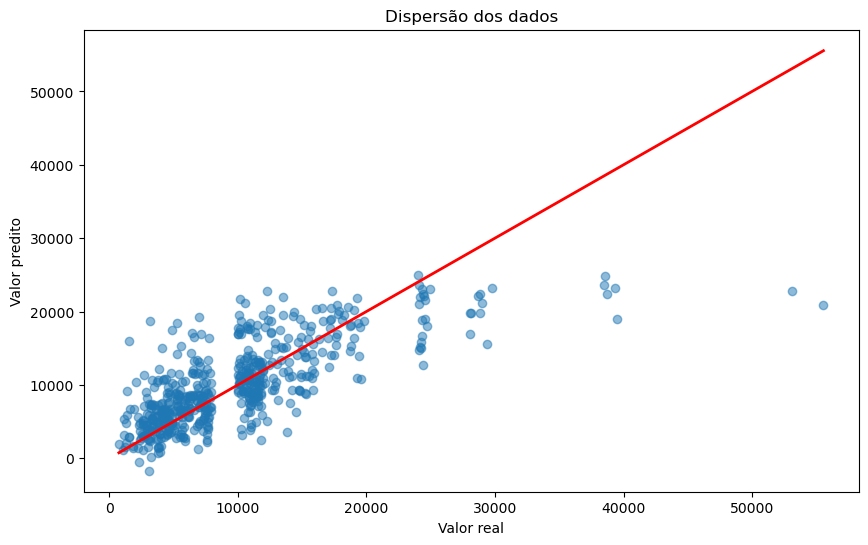

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.title('Dispersão dos dados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

In [49]:
nome_atributos = X_train.columns
nome_atributos

Index(['IDADE', 'NAO BRANCA', 'TEMPO EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype='object')

In [50]:
coefs = pd.DataFrame(model.coef_, columns=['coeficientes'], index=nome_atributos)

In [52]:
coefs = coefs.sort_values(by='coeficientes', ascending=False)

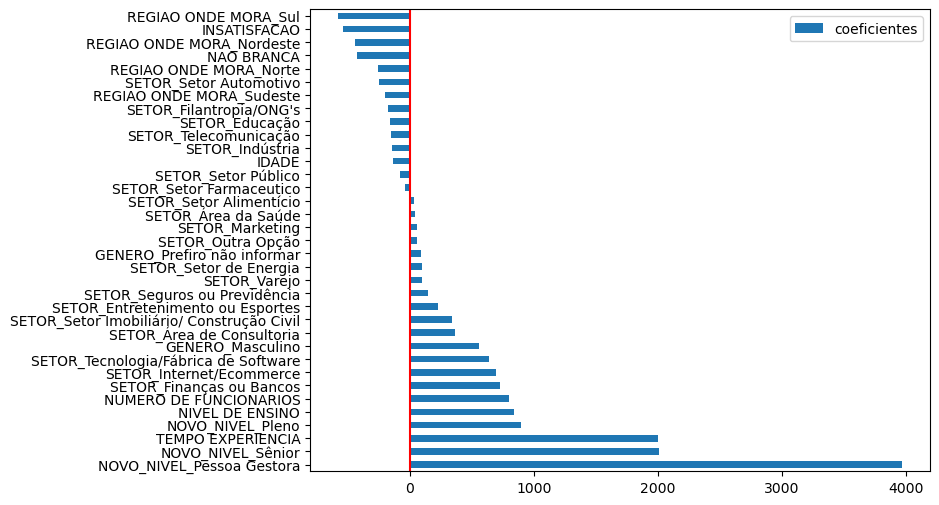

In [53]:
coefs.plot.barh(figsize=(8, 6))
plt.axvline(x=0, color='red')